In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Given Well data
tp = 310  # hrs
Qo = 4900  # STB/day
rw = 0.354  # ft
ct = 22.6 * pow(10, -6)  # 1/psi
H = 482  # ft
Pwf_det0 = 2761  # psia
Uo = 0.20  # cp
porosity = 0.09
Bo = 1.55  # rbl/STB
casing_id = 0.523  # ft

In [7]:
# Importing PBU Well test data
df = pd.read_excel(r"C:\Users\Win10\Downloads\testAnalysis (1).xlsx")
print(df.head())

   delt   Pwf
0  0.00  2761
1  0.10  3057
2  0.21  3153
3  0.31  3234
4  0.52  3249


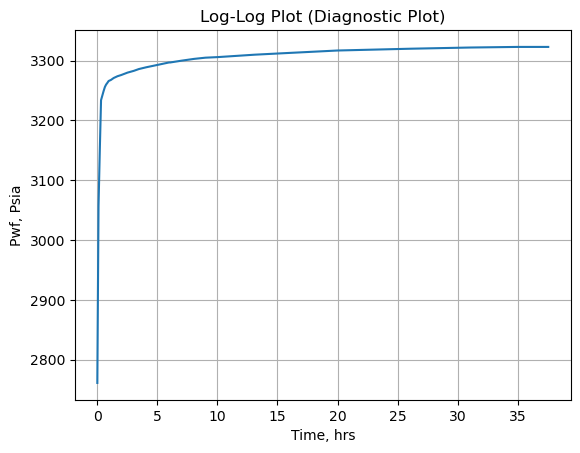

In [9]:
# Time vs Pwf Plot
plt.style.use('default')
plt.plot(df['delt'], df['Pwf'])
plt.title('Log-Log Plot (Diagnostic Plot)')
plt.xlabel('Time, hrs')
plt.ylabel("Pwf, Psia")
plt.grid()
plt.show()

In [11]:
# Adding column for tp + delt / delt
df['tp+delt/delt'] = (tp + df['delt']) / df['delt']
print(df.head())

   delt   Pwf  tp+delt/delt
0  0.00  2761           inf
1  0.10  3057   3101.000000
2  0.21  3153   1477.190476
3  0.31  3234   1001.000000
4  0.52  3249    597.153846


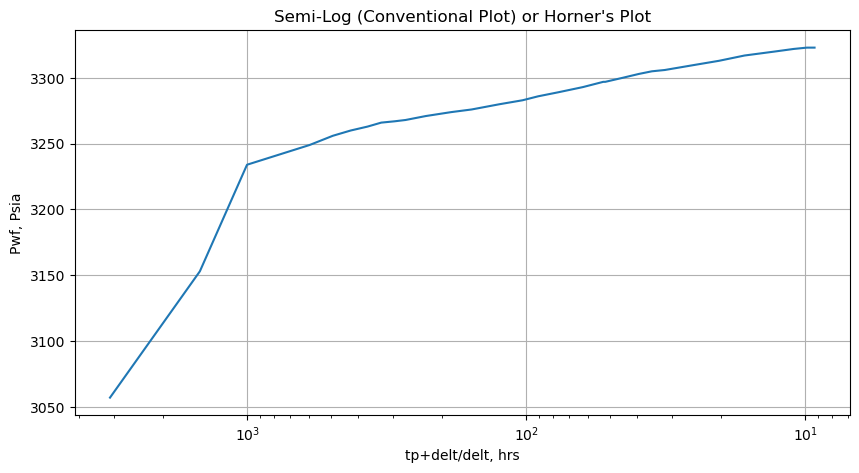

In [13]:
# Semi Log Plot of Pwf vs tp+delt/delt
plt.style.use('default')
plt.figure(figsize=(10, 5))
plt.semilogx(df['tp+delt/delt'], df['Pwf'])
plt.gca().invert_xaxis()
plt.title('Semi-Log (Conventional Plot) or Horner\'s Plot')
plt.xlabel('tp+delt/delt, hrs')
plt.ylabel("Pwf, Psia")
plt.grid()
plt.show()

In [15]:
# Straight Line Part (excluding well bore storage effect region)
df_SL = df.iloc[3:, :]


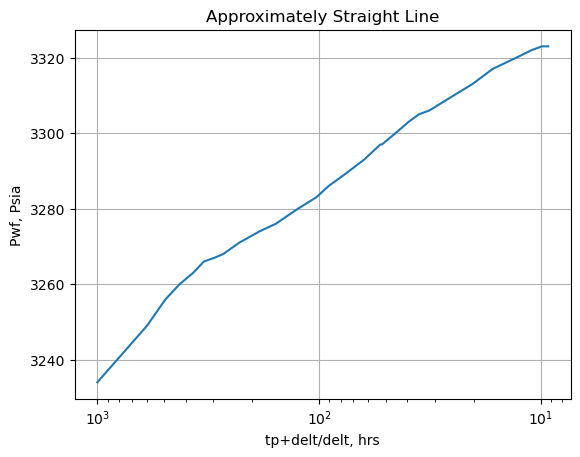

In [17]:
plt.style.use('default')
plt.semilogx(df_SL['tp+delt/delt'], df_SL['Pwf'])
plt.gca().invert_xaxis()
plt.title('Approximately Straight Line')
plt.xlabel('tp+delt/delt, hrs')
plt.ylabel("Pwf, Psia")
plt.grid()
plt.show()

In [19]:
# Thickness Averaged Permeability Calculation
# Equation: Pwf = Pi - (162.6 * Qo * Uo * Bo) / (k * H) * log(tp + delt / delt)
# On comparing with y = a + mx:
# intercept a = Pi, slope m = -(162.6 * Qo * Uo * Bo) / (k * H)

# Slope from the above straight line (using two points)
m = -(3306 - 3310) / (np.log10(31) - np.log10(24.68))

# Calculating Permeability
k = (162.6 * Qo * Bo * Uo) / (m * H)  # in md
print("The average Permeability obtained is: {} md".format(k))

# Skin Factor Calculation
# Using Superposition Principle to estimate the skin factor
P1hr = 3266  # psia
s = 1.151 * ((P1hr - Pwf_det0) / m - np.log10(k / (porosity * Uo * ct * rw ** 2)) + 3.23)
print("The skin factor value obtained is: {}".format(s))
print("Positive Skin factor denotes Formation damage")

The average Permeability obtained is: 12.684665678184713 md
The skin factor value obtained is: 8.442523335459487
Positive Skin factor denotes Formation damage
